In [1]:
### PROJECT SCRIPT
### Visualizing Covid-19
### CISC5450 Mathematics for Data Science
### Professor: Dr. Mohammad Ruhul Amin
### Prepared by: Yuliya Akchurina

### Country: Belgium
### Time period: March 1st, 2020 - Nov 30th, 2020

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 

In [3]:
#Import the datasets 

owid = pd.read_csv('owid-covid-data.csv')
#mob = pd.read_csv('applemobilitytrends-2020-12-02.csv')
mob = pd.read_csv('applemobilitytrends-2020-12-07.csv')
hdi = pd.read_csv('Human development index (HDI).csv')
recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

C:\Users\Yuliya.DESKTOP-FMS37R3\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# prepare dataset: March 1st - Nov 30, all countries
df = owid
mask = (df['date'] > '2020-02-29') & (df['date'] <= '2020-11-30')
filtered_df=df.loc[mask]

In [5]:
# Dataset for Belgium Mar 1st - Nov 30th
x = 'Belgium'
df = owid.query(f"location == '{x}'")
mask = (df['date'] > '2020-02-29') & (df['date'] <= '2020-11-30')
filtered_df_belgium=df.loc[mask]
#print(filtered_df_belgium.head())
#print(filtered_df_belgium.tail())

C:\Users\Yuliya.DESKTOP-FMS37R3\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


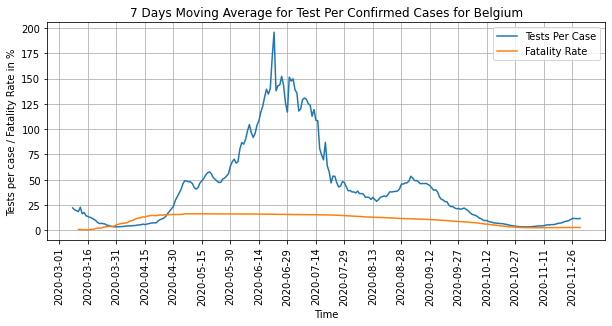

In [26]:
# Q5.  7 Days Moving Average for Test Per Confirmed Cases and Fatality Rate for Belgium
# case fatality rate = (number of deaths/ number of confirmed cases)*100,  over a period of time

# DF for Belgium Mar 1st - Nov 30th
x = 'Belgium'
df = owid.query(f"location == '{x}'")
mask = (df['date'] > '2020-02-29') & (df['date'] <= '2020-11-30')
filtered_df_belgium=df.loc[mask]

case_fatality = (filtered_df_belgium['total_deaths']/filtered_df_belgium['total_cases'])*100
filtered_df_belgium['fatality_rate'] = case_fatality

#plt.figure(figsize = (15,10))
#change plot size for slides
plt.figure(figsize = (10,4))

plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Tests per case / Fatality Rate in %')
plt.title('7 Days Moving Average for Test Per Confirmed Cases for Belgium')
plt.xticks(np.arange(0, 275, 15),rotation=90)

plt.plot(filtered_df_belgium['date'], filtered_df_belgium['tests_per_case'], label="Tests Per Case")
plt.plot(filtered_df_belgium['date'], filtered_df_belgium['fatality_rate'], label="Fatality Rate")

#plt.plot(filtered_df_belgium['date'], filtered_df_belgium['new_deaths_per_million'], label="New Deaths Per Million")

#plot the graph
plt.legend(loc = 'upper right')
figure = plt.gcf()
#save the plot in a png file
#plt.savefig("plot5a.png", dpi=200,format='png',bbox_inches='tight')


In [29]:
filtered_df_belgium['tests_per_case'].describe()

count    268.000000
mean      41.241791
std       41.221098
min        3.400000
25%        7.725000
50%       32.550000
75%       50.400000
max      195.800000
Name: tests_per_case, dtype: float64

In [30]:
filtered_df_belgium['fatality_rate'].describe()

count    265.000000
mean      10.667568
std        5.343638
min        0.451467
25%        5.379795
50%       12.194884
75%       15.717730
max       16.421496
Name: fatality_rate, dtype: float64

C:\Users\Yuliya.DESKTOP-FMS37R3\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


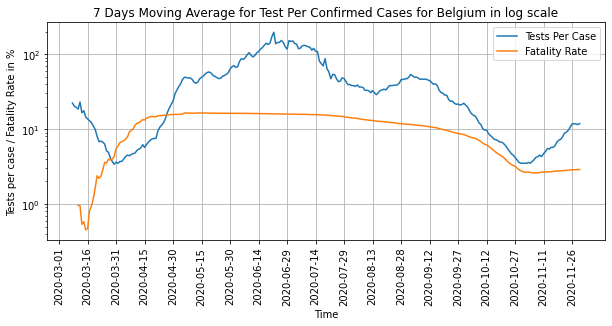

In [25]:
# Q5. Plot in log scale
# 7 Days Moving Average for Test Per Confirmed Cases and Fatality Rate for Belgium
# case fatality rate = (number of deaths/ number of confirmed cases)*100,  over a period of time

# Dataset for Belgium Mar 1st - Nov 30th
x = 'Belgium'
df = owid.query(f"location == '{x}'")
mask = (df['date'] > '2020-02-29') & (df['date'] <= '2020-11-30')
filtered_df_belgium=df.loc[mask]

case_fatality = (filtered_df_belgium['total_deaths']/filtered_df_belgium['total_cases'])*100
filtered_df_belgium['fatality_rate'] = case_fatality

#plt.figure(figsize = (15,10))
#change plot size for slides
plt.figure(figsize = (10,4))

plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Tests per case / Fatality Rate in %')
plt.title('7 Days Moving Average for Test Per Confirmed Cases for Belgium in log scale')
plt.xticks(np.arange(0, 275, 15),rotation=90)

plt.plot(filtered_df_belgium['date'], filtered_df_belgium['tests_per_case'], label="Tests Per Case")
plt.plot(filtered_df_belgium['date'], filtered_df_belgium['fatality_rate'], label="Fatality Rate")

#plt.plot(filtered_df_belgium['date'], filtered_df_belgium['new_deaths_per_million'], label="New Deaths Per Million")
plt.yscale("log")

#plot the graph
plt.legend(loc = 'upper right')
figure = plt.gcf()
#save the plot in a png file
#plt.savefig("plot5b.png", dpi=200,format='png',bbox_inches='tight')

C:\Users\Yuliya.DESKTOP-FMS37R3\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Yuliya.DESKTOP-FMS37R3\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


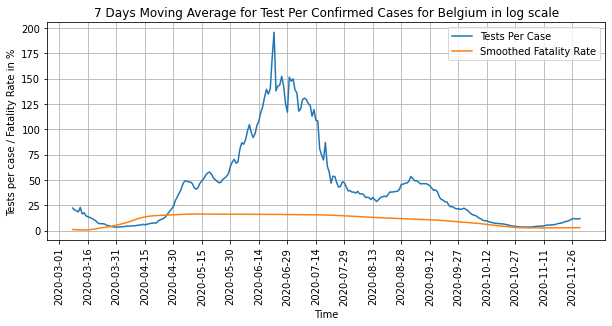

In [81]:
# Q5.Plot in log scale and 7 days moving average for fatality rate 
# 7 Days Moving Average for Test Per Confirmed Cases and Fatality Rate for Belgium
# case fatality rate = (number of deaths/ number of confirmed cases)*100,  over a period of time

# Dataset for Belgium Mar 1st - Nov 30th
x = 'Belgium'
df = owid.query(f"location == '{x}'")
mask = (df['date'] > '2020-02-29') & (df['date'] <= '2020-11-30')
filtered_df_belgium=df.loc[mask]

case_fatality = (filtered_df_belgium['total_deaths']/filtered_df_belgium['total_cases'])*100
filtered_df_belgium['fatality_rate'] = case_fatality

#7 days moving average of fatality_rate
filtered_df_belgium['smoothed_fatality_rate'] = filtered_df_belgium['fatality_rate'].rolling(7, min_periods=1,center= True).mean()
                                             
                                             
#plt.figure(figsize = (15,10))
#change plot size for slides
plt.figure(figsize = (10,4))

plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Tests per case / Fatality Rate in %')
plt.title('7 Days Moving Average for Test Per Confirmed Cases for Belgium in log scale')
plt.xticks(np.arange(0, 275, 15),rotation=90)

plt.plot(filtered_df_belgium['date'], filtered_df_belgium['tests_per_case'], label="Tests Per Case")
plt.plot(filtered_df_belgium['date'], filtered_df_belgium['smoothed_fatality_rate'], label="Smoothed Fatality Rate")

#plt.yscale("log")

#plot the graph
plt.legend(loc = 'upper right')
figure = plt.gcf()
#save the plot in a png file
#plt.savefig("plot5d.png", dpi=200,format='png',bbox_inches='tight')

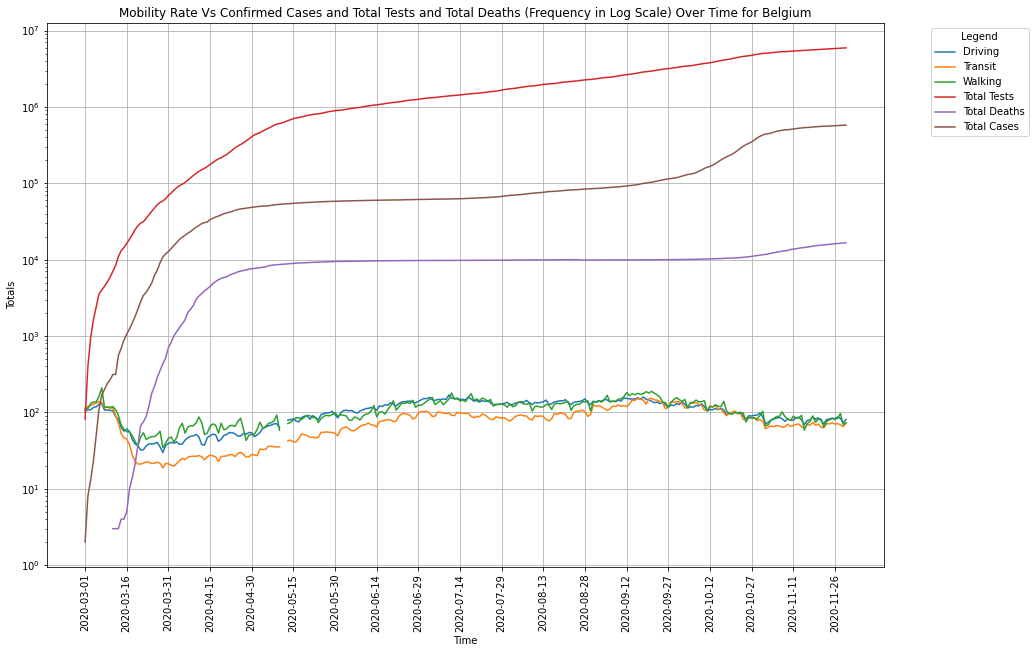

In [23]:
# Q7. Mobility Vs Confirmed Cases and Total Tests and Total Deaths (Frequency in Log Scale) Over Time for Belgium

# extract data for Belgium
x = 'Belgium'
mob_belgium = mob.query(f"region == '{x}'").drop(['geo_type','alternative_name', 'sub-region', 'country'], axis=1)

# transpose mobility dataframe 
mob_belgium = mob_belgium.transpose(copy=True)

# rename corresponding columns driving, transit, walking 
mob_belgium.columns = ['driving','transit','walking']

mob_belgium = mob_belgium[(mob_belgium.index > "2020-02-29")&(mob_belgium.index < "2020-12-01")]

# add combined column for average mobility 
mob_belgium['avg_mobility'] = (mob_belgium['driving']+mob_belgium['transit']+mob_belgium['walking'])/3

plt.figure(figsize = (15,10))
#plt.figure(figsize = (10,4)) # size of plot picture for the report 
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Totals')
plt.title('Mobility Rate Vs Confirmed Cases and Total Tests and Total Deaths (Frequency in Log Scale) Over Time for Belgium')
plt.xticks(np.arange(0, 275, 15),rotation=90)

plt.plot(mob_belgium.index, mob_belgium['driving'], label="Driving")
plt.plot(mob_belgium.index, mob_belgium['transit'], label="Transit")
plt.plot(mob_belgium.index, mob_belgium['walking'], label="Walking")
#plt.plot(mob_belgium.index, mob_belgium['avg_mobility'], label="Mobility Avg")

plt.plot(filtered_df_belgium['date'], filtered_df_belgium['total_tests'], label="Total Tests")
plt.plot(filtered_df_belgium['date'], filtered_df_belgium['total_deaths'], label="Total Deaths")
plt.plot(filtered_df_belgium['date'], filtered_df_belgium['total_cases'], label="Total Cases")
plt.yscale("log")

#plot the graph
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(b=True,axis='y')
figure = plt.gcf()

#save plot
#plt.savefig("plot7.png", dpi=200,format='png',bbox_inches='tight')



In [9]:
# Q9. Current Confirmed Cases Vs Current Deaths of All Countries

In [10]:
filtered_df['total_deaths_per_million'].describe()

count    42888.000000
mean        99.854440
std        193.995945
min          0.001000
25%          3.723750
50%         19.065000
75%         87.634250
max       1436.199000
Name: total_deaths_per_million, dtype: float64

In [11]:
filtered_df['total_cases_per_million'].describe()

count    49794.000000
mean      3511.634353
std       7049.514711
min          0.002000
25%         85.394500
50%        594.530000
75%       3647.157000
max      87296.965000
Name: total_cases_per_million, dtype: float64

<Figure size 432x288 with 0 Axes>

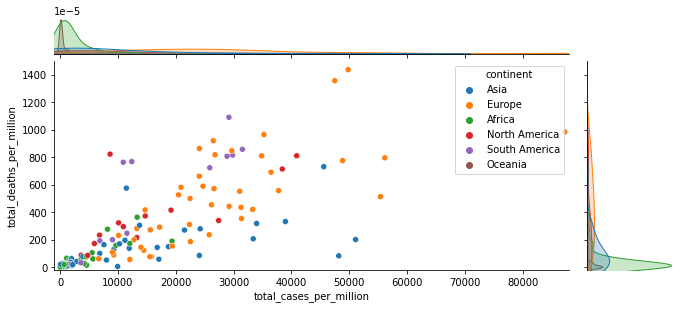

In [46]:
# Q9 Better X and Y scale based on min and max values
# Select the date for the plot. 
# Filter theataet to include only data for selected date
select_date = '2020-11-30'
df = owid
mask = (df['date'] == select_date)
filtered_df=df.loc[mask]

plt.clf()
# Using the Total Deaths and Total Cases columns
#plot = sns.jointplot(data=filtered_df, x=filtered_df['total_deaths'],y=filtered_df['total_cases'],hue='continent')

#Using the Total Deaths Per Million and Total Cases Per Million
#plot = sns.jointplot(data=filtered_df, x=filtered_df['total_deaths_per_million'],y=filtered_df['total_cases_per_million'],hue='continent')
plot = sns.jointplot(data=filtered_df, x=filtered_df['total_cases_per_million'],y=filtered_df['total_deaths_per_million'],hue='continent')

plot.ax_marg_x.set_xlim(-1000, 88000)
plot.ax_marg_y.set_ylim(-20,1500 )

plt.title('Current Confirmed Cases Vs Current Deaths of All Countries',horizontalalignment= 'left')

figure = plt.gcf()

#figure.set_size_inches(10, 8)
figure.set_size_inches(10, 4)
plt.savefig("plot9.png", dpi=200,format='png',bbox_inches='tight')


C:\Users\Yuliya.DESKTOP-FMS37R3\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<Figure size 432x288 with 0 Axes>

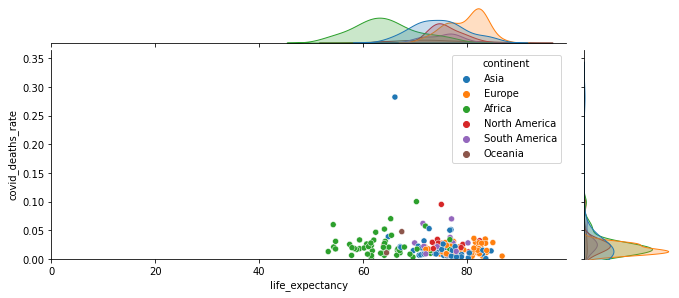

In [19]:
# Q10. Life Expectancy Vs Current Death Rate of All Countries

# Select the date for the plot. 
# Filter theataet to include only data for selected date
select_date = '2020-11-30'
df = owid
mask = (df['date'] == select_date)
filtered_df=df.loc[mask]

covid_deaths_rate = filtered_df['total_deaths']/filtered_df['total_cases']
filtered_df['covid_deaths_rate'] = covid_deaths_rate

plt.clf()

plot = sns.jointplot(data=filtered_df, x= filtered_df['life_expectancy'],y= filtered_df['covid_deaths_rate'], hue='continent')
plot.ax_marg_x.set_xlim(0, )
plot.ax_marg_y.set_ylim(0, )

plt.title('Life Expectancy Vs Current Death Rate of All Countries',horizontalalignment= 'left')
figure = plt.gcf()
#figure.set_size_inches(10, 8)
figure.set_size_inches(10, 4)
plt.savefig("plot10a.png", dpi=200,format='png',bbox_inches='tight')


C:\Users\Yuliya.DESKTOP-FMS37R3\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 432x288 with 0 Axes>

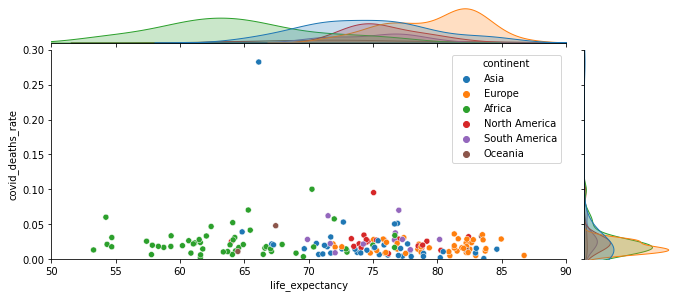

In [48]:
# Q10. Life Expectancy Vs Current Death Rate of All Countries

# Better X axis scale based on min and max values for the life expectance column
# min       53.280000
# max       86.750000

# Better Y axis scale based on min and max values for the covid deaths rate column
#min        0.000498
#max        0.282519

select_date = '2020-11-30'
df = owid
mask = (df['date'] == select_date)
filtered_df=df.loc[mask]

covid_deaths_rate = filtered_df['total_deaths']/filtered_df['total_cases']
filtered_df['covid_deaths_rate'] = covid_deaths_rate

plt.clf()

plot = sns.jointplot(data=filtered_df, x= filtered_df['life_expectancy'],y= filtered_df['covid_deaths_rate'], hue='continent')
plot.ax_marg_x.set_xlim(50,90)
plot.ax_marg_y.set_ylim(0, 0.3)

plt.title('Life Expectancy Vs Current Death Rate of All Countries',horizontalalignment= 'left')
figure = plt.gcf()
#figure.set_size_inches(10, 8)
figure.set_size_inches(10, 4)
plt.savefig("plot10b.png", dpi=200,format='png',bbox_inches='tight')